In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('./data_final.csv')

In [4]:
data.columns

Index(['Y', 'ltV', 'leV', 'trV', 'leS', 'trS', 'leT', 'trT', 'leToeUi',
       'leswpht', 'trToeUi', 'trswpht', 'leToeMa', 'trToeMa', 'pelv(1,:)',
       'pelv(1,:)_1', 'pelv(1,:)_2', 'pelv(2,:)', 'pelv(2,:)_1', 'pelv(2,:)_2',
       'pelv(3,:)', 'pelv(3,:)_1', 'pelv(3,:)_2', 'pelv(4,:)', 'pelv(4,:)_1',
       'pelv(4,:)_2', 'pelv(5,:)', 'pelv(5,:)_1', 'pelv(5,:)_2', 'pelv(6,:)',
       'pelv(6,:)_1', 'pelv(6,:)_2', 'leA(1,:)', 'leA(1,:)_1', 'leA(1,:)_2',
       'leA(2,:)', 'leA(2,:)_1', 'leA(2,:)_2', 'leA(3,:)', 'leA(3,:)_1',
       'leA(3,:)_2', 'trA(1,:)', 'trA(1,:)_1', 'trA(1,:)_2', 'trA(2,:)',
       'trA(2,:)_1', 'trA(2,:)_2', 'trA(3,:)', 'trA(3,:)_1', 'trA(3,:)_2',
       'leM(1,:)', 'leM(1,:)_1', 'leM(1,:)_2', 'leM(2,:)', 'leM(2,:)_1',
       'leM(2,:)_2', 'leM(3,:)', 'leM(3,:)_1', 'leM(3,:)_2', 'trM(1,:)',
       'trM(1,:)_1', 'trM(1,:)_2', 'trM(2,:)', 'trM(2,:)_1', 'trM(2,:)_2',
       'trM(3,:)', 'trM(3,:)_1', 'trM(3,:)_2', 'leP(1,:)', 'leP(1,:)_1',
       'leP(1,:)_2', 'leP

In [5]:
data.shape

(1346, 99)

In [6]:
data['label'].value_counts()

0    759
2    329
1    133
3    125
Name: label, dtype: int64

In [7]:
data_X = data.drop(['label'], axis=1)
data_X.shape

(1346, 98)

## 处理类别不平衡问题

In [8]:
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler()
data_X, y = rus.fit_resample(data_X, data['label'])
print(data_X.shape)
print(y.shape)

(3036, 98)
(3036,)


In [9]:
y.value_counts()

0    759
2    759
1    759
3    759
Name: label, dtype: int64

## 现在分各种情况的输入数据

In [10]:
X_conditions = data_X[['condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'condition_6', 'condition_7',
       'condition_8', 'condition_9', 'condition_10', 'condition_11',
       'condition_12']]
X_ltV2trs = data_X[['ltV', 'leV', 'trV', 'leS', 'trS','leT', 'trT', 'leToeUi', 'leswpht', 'trToeUi', 'trswpht']]
X_pelv = data_X[['pelv(1,:)',
       'pelv(1,:)_1', 'pelv(1,:)_2', 'pelv(2,:)', 'pelv(2,:)_1', 'pelv(2,:)_2',
       'pelv(3,:)', 'pelv(3,:)_1', 'pelv(3,:)_2', 'pelv(4,:)', 'pelv(4,:)_1',
       'pelv(4,:)_2', 'pelv(5,:)', 'pelv(5,:)_1', 'pelv(5,:)_2', 'pelv(6,:)',
       'pelv(6,:)_1', 'pelv(6,:)_2']]
X_A = data_X[[ 'leA(1,:)', 'leA(1,:)_1', 'leA(1,:)_2',
       'leA(2,:)', 'leA(2,:)_1', 'leA(2,:)_2', 'leA(3,:)', 'leA(3,:)_1',
       'leA(3,:)_2', 'trA(1,:)', 'trA(1,:)_1', 'trA(1,:)_2', 'trA(2,:)',
       'trA(2,:)_1', 'trA(2,:)_2', 'trA(3,:)', 'trA(3,:)_1', 'trA(3,:)_2']]
X_M = data_X[[ 'leM(1,:)', 'leM(1,:)_1', 'leM(1,:)_2', 'leM(2,:)', 'leM(2,:)_1',
       'leM(2,:)_2', 'leM(3,:)', 'leM(3,:)_1', 'leM(3,:)_2', 'trM(1,:)',
       'trM(1,:)_1', 'trM(1,:)_2', 'trM(2,:)', 'trM(2,:)_1', 'trM(2,:)_2',
       'trM(3,:)', 'trM(3,:)_1', 'trM(3,:)_2']]
X_P = data_X[[ 'leP(1,:)', 'leP(1,:)_1',
       'leP(1,:)_2', 'leP(2,:)', 'leP(2,:)_1', 'leP(2,:)_2', 'leP(3,:)',
       'leP(3,:)_1', 'leP(3,:)_2', 'trP(1,:)', 'trP(1,:)_1', 'trP(1,:)_2',
       'trP(2,:)', 'trP(2,:)_1', 'trP(2,:)_2', 'trP(3,:)', 'trP(3,:)_1',
       'trP(3,:)_2']]


### 相关性热力图分析

In [15]:
def heatmap(X, y):
    data = pd.concat([X, y], axis=1)
    corrmat = data.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(20,20))
    #plot heat map
    sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
    plt.show()
    # plt.savefig('correlation.png')

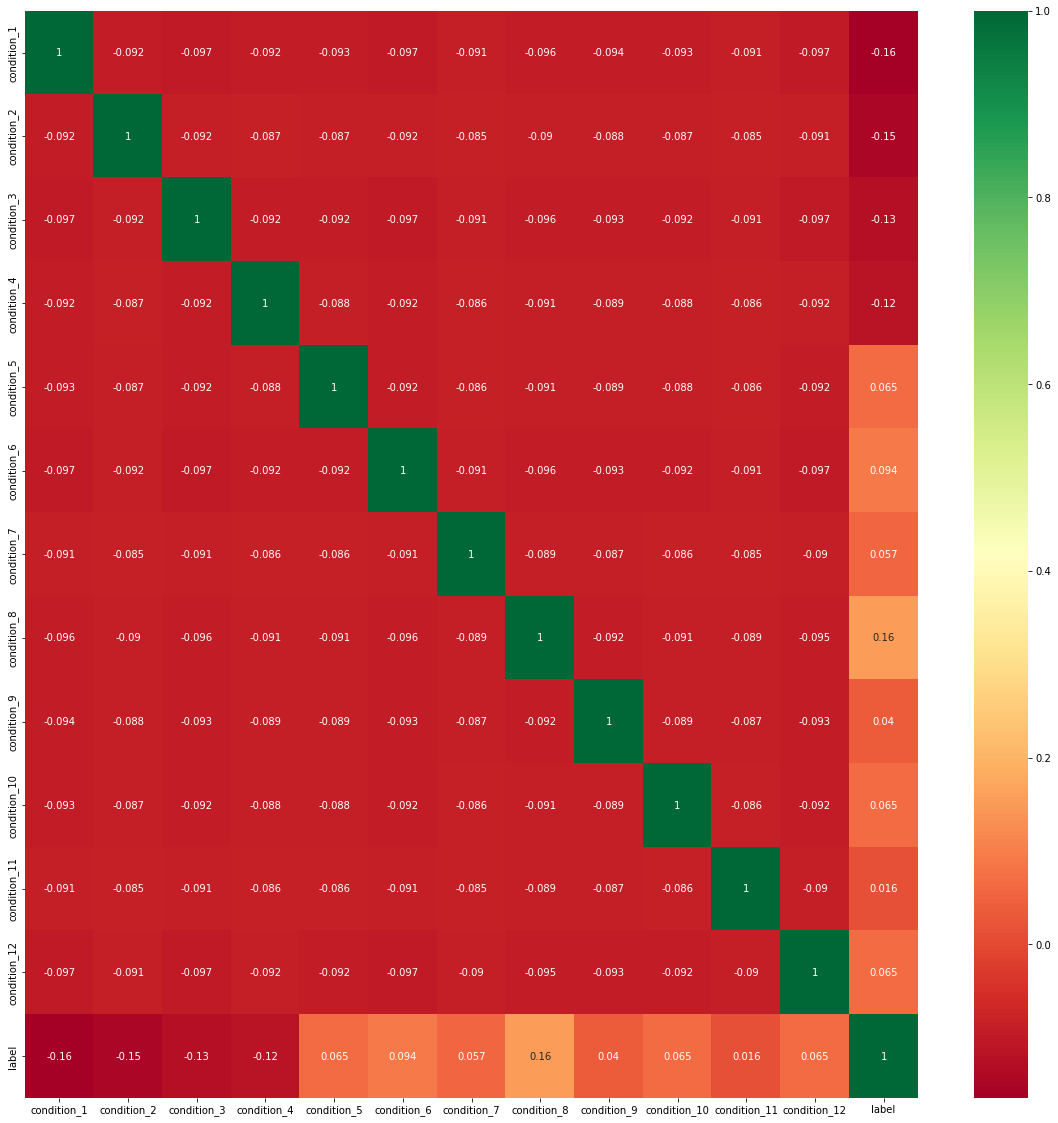

In [16]:
heatmap(X_conditions, y)

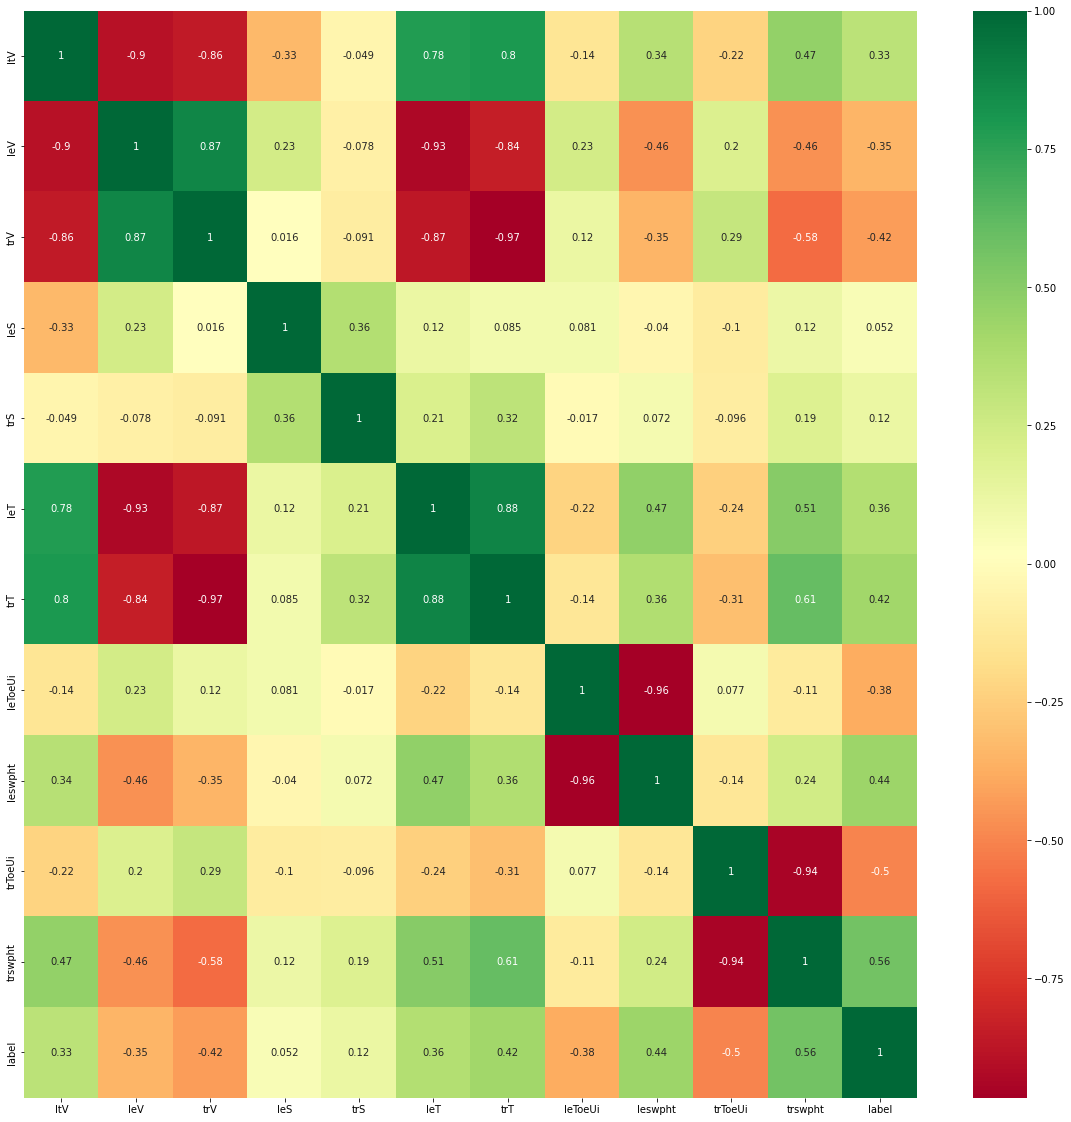

In [17]:
heatmap(X_ltV2trs, y)

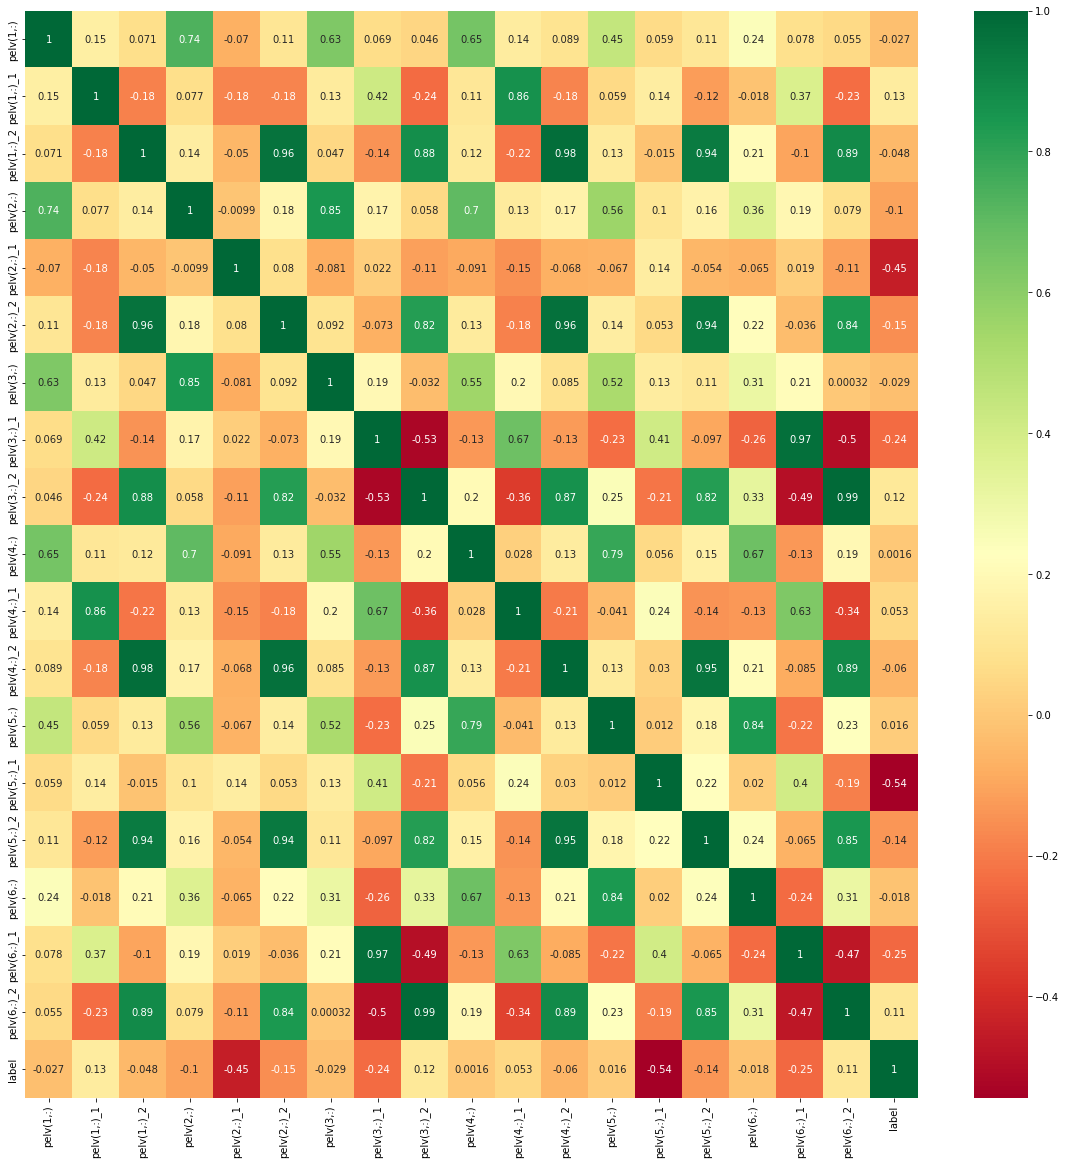

In [18]:
heatmap(X_pelv, y)

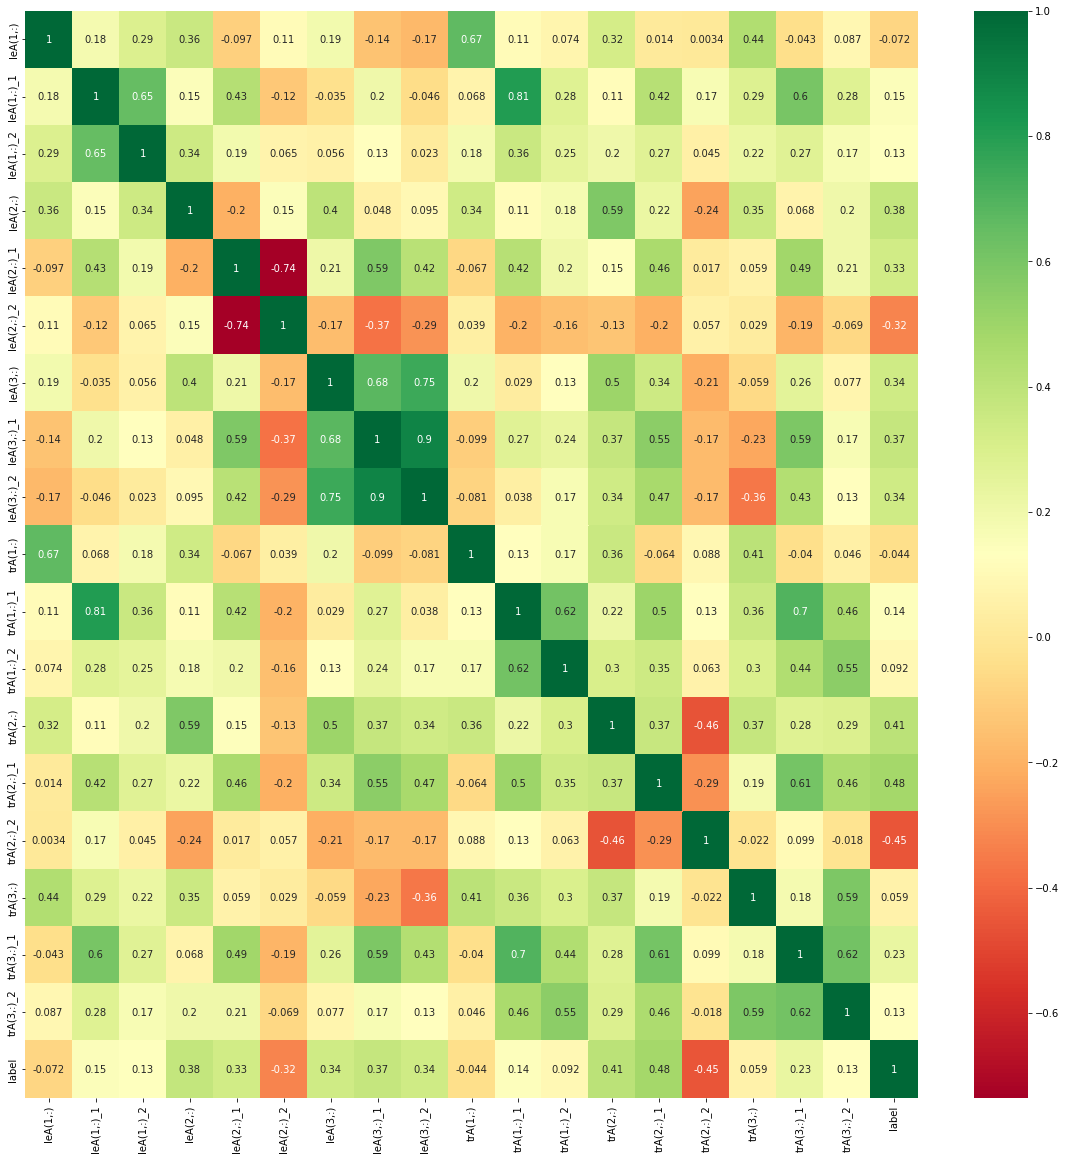

In [20]:
heatmap(X_A, y)

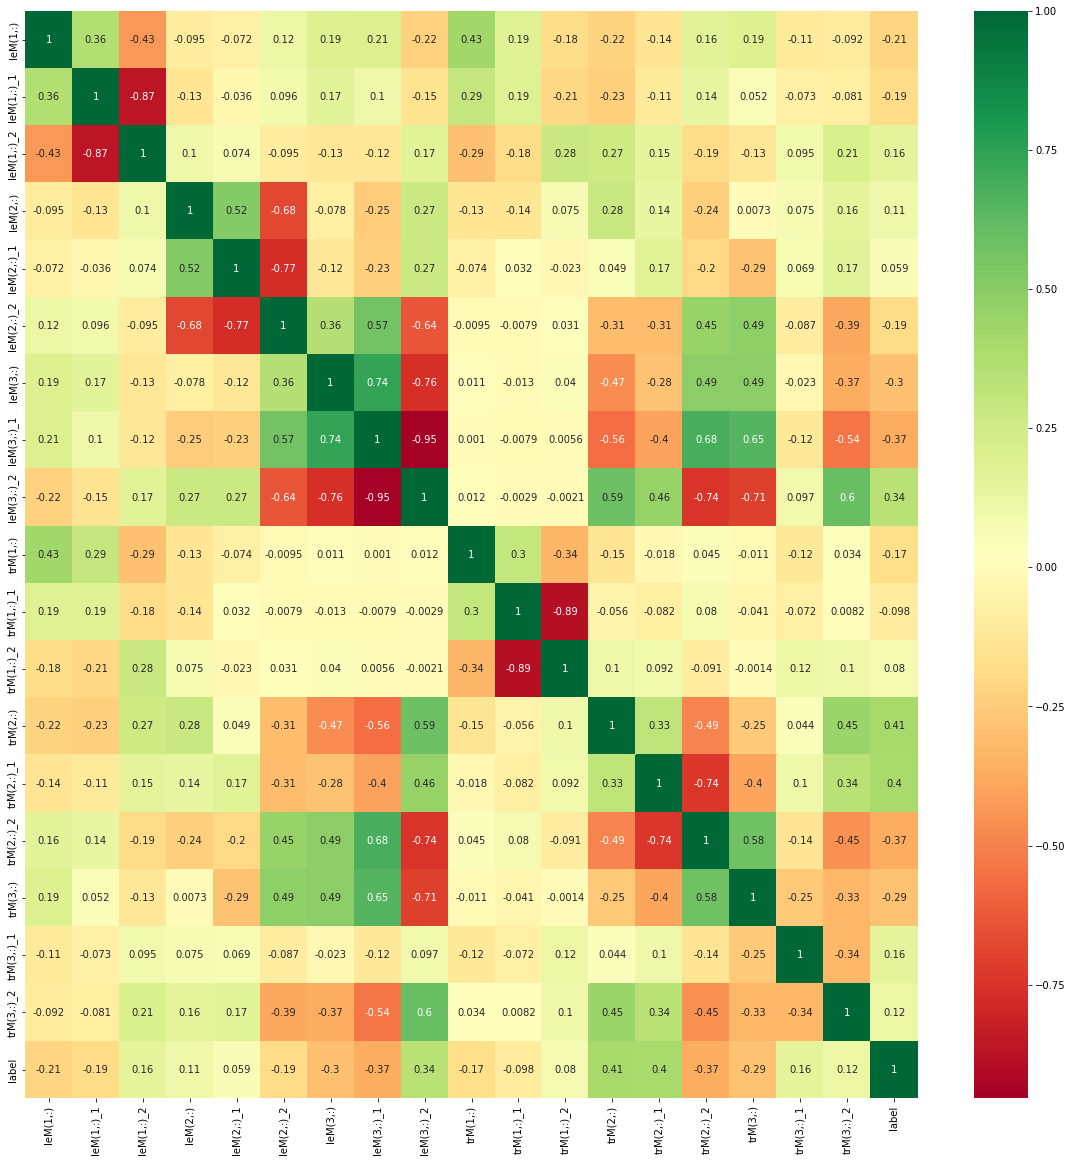

In [21]:
heatmap(X_M, y)

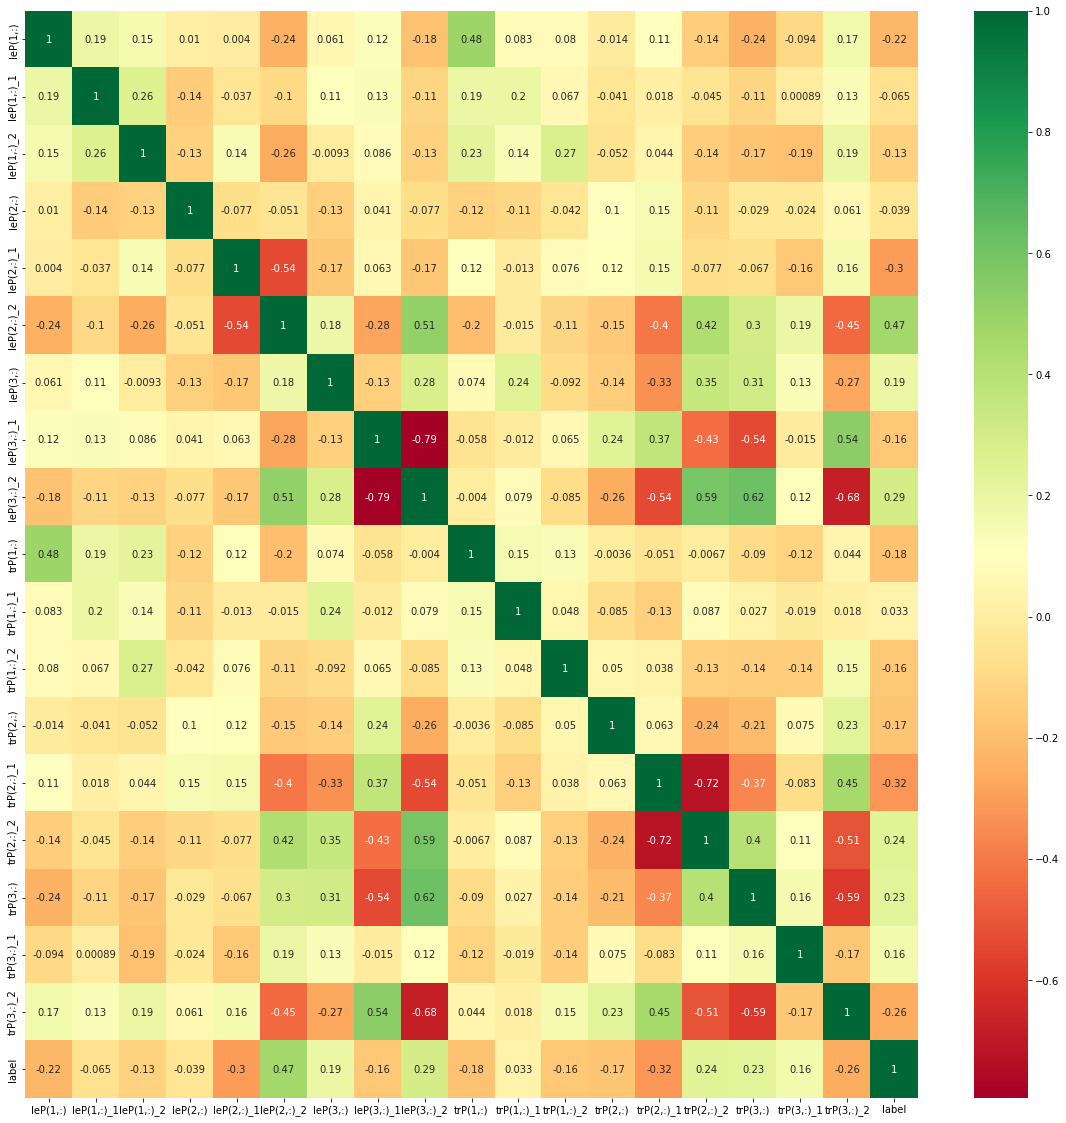

In [22]:
heatmap(X_P, y)

## feature importance 分析

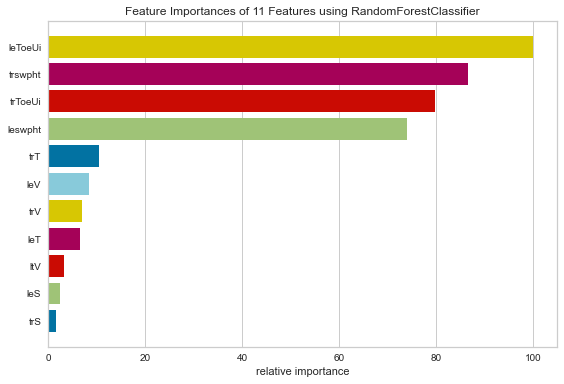

<AxesSubplot:title={'center':'Feature Importances of 11 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from yellowbrick.model_selection import FeatureImportances

#修改分类模型
model = RandomForestClassifier()
# model = LogisticRegression()
# model = AdaBoostClassifier()

viz = FeatureImportances(model)
#修改输入
# viz.fit(data_X, y)
# viz.fit(X_conditions, y)
viz.fit(X_ltV2trs, y)
# viz.fit(X_pelv, y)
# viz.fit(X_A, y)
# viz.fit(X_M, y)
# viz.fit(X_P, y)
viz.show()

## RFECV分析

通过递归消除每一列观察对模型分类精度的影响确认重要程度

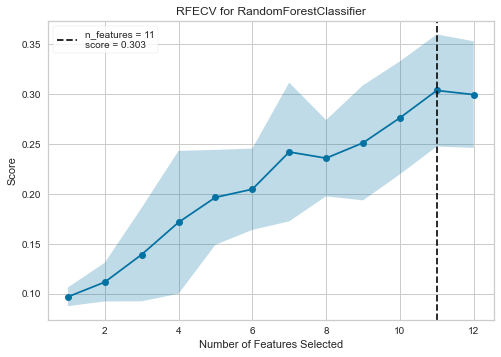

<AxesSubplot:title={'center':'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [13]:
from sklearn.svm import SVC
from yellowbrick.model_selection import RFECV
from sklearn.model_selection import StratifiedKFold

#修改模型

model = RandomForestClassifier()
mdoel = SVC(kernel='linear', C=1)
# model = LogisticRegression()
# model = AdaBoostClassifier()
# Instantiate RFECV visualizer with a linear SVM classifier
cv = StratifiedKFold(5)
viz= RFECV(model,cv=cv, scoring='f1_weighted')

viz.fit(X_conditions, y)
# viz.fit(X_ltV2trs, y)
# viz.fit(X_pelv, y)
# viz.fit(X_A, y)
# viz.fit(X_M, y)
# viz.fit(X_P, y)
viz.show()   

## 分类模型分析

首先由如下这么多分类模型

In [15]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
models = [
    SVC(gamma='auto'), LinearSVC(),
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(),
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3),
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=300),
    RandomForestClassifier(n_estimators=300)
]


测试一下每个模型的评分

In [18]:
def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    model = Pipeline([
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted, average='weighted')))

for model in models:
    # score_model(X_conditions, y, model)
    # score_model(X_ltV2trs, y, model)
    # score_model(X_pelv, y, model)
    score_model(X_A, y, model)
    # score_model(X_M, y, model)
    # score_model(X_P, y, model)
    

SVC: 0.9937414205424359
LinearSVC: 0.9950591277233146
SGDClassifier: 0.9944002621252164
KNeighborsClassifier: 0.9973649218675815
LogisticRegression: 0.9950591277233146
LogisticRegressionCV: 0.9950591277233146
BaggingClassifier: 1.0
ExtraTreesClassifier: 1.0
RandomForestClassifier: 1.0


可视化不同模型的分类情况

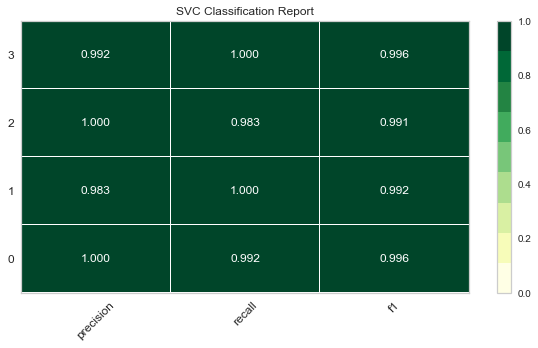

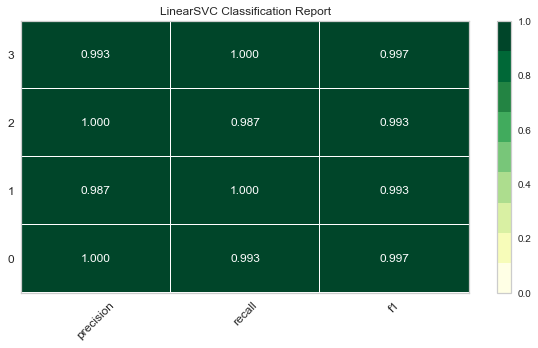

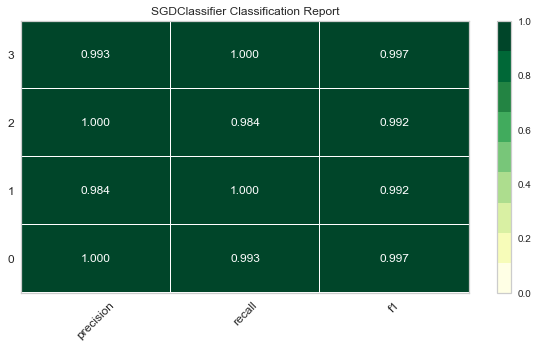

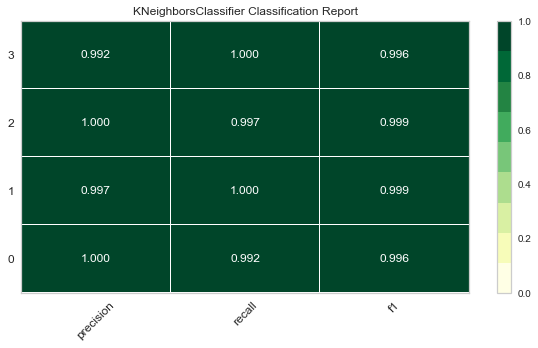

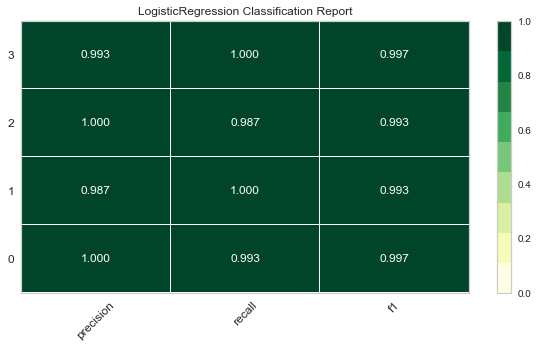

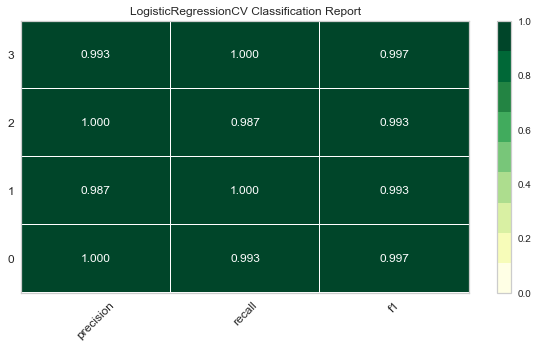

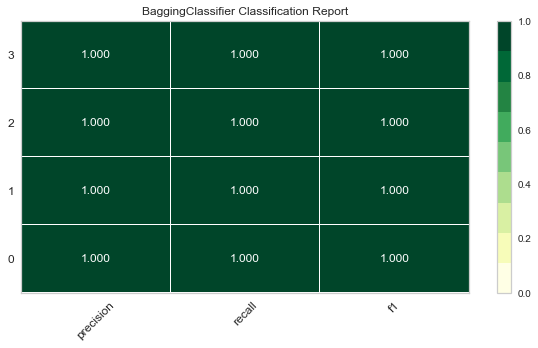

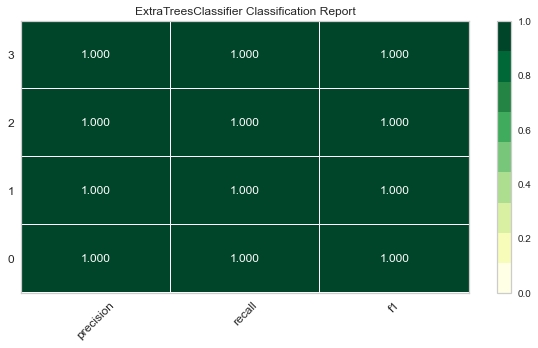

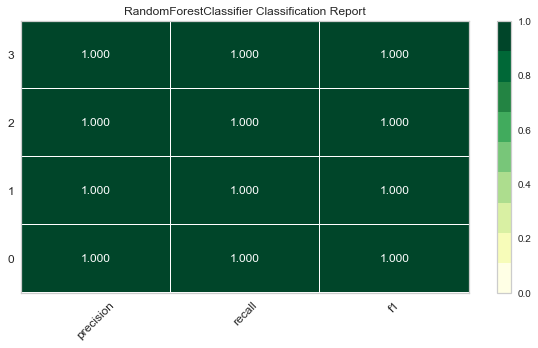

In [19]:
from yellowbrick.classifier import ClassificationReport


def visualize_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    model = Pipeline([
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=np.unique(y).tolist(),
        cmap="YlGn", size=(600, 360), **kwargs
    )
    visualizer.fit(X, y)
    visualizer.score(X, y)
    visualizer.show()

for model in models:
    # visualize_model(X_conditions, y, model)
    # visualize_model(X_ltV2trs, y, model)
    # visualize_model(X_pelv, y, model)
    visualize_model(X_A, y, model)
    # visualize_model(X_M, y, model)
    # visualize_model(X_P, y, model)

## 通过打分机制选择最相关的变量

详细参考网站： https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html


打分函数有：

f_classif: ANOVA F-value between label/feature for classification tasks.

mutual_info_classif: Mutual information for a discrete target.

chi2: Chi-squared stats of non-negative features for classification tasks.

f_regression: F-value between label/feature for regression tasks.

mutual_info_regression: Mutual information for a continuous target.

SelectPercentile: Select features based on percentile of the highest scores.

SelectFpr: Select features based on a false positive rate test.

SelectFdr: Select features based on an estimated false discovery rate.

SelectFwe: Select features based on family-wise error rate.

GenericUnivariateSelect: Univariate feature selector with configurable mode.

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

 #target column i.e price range
#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=f_classif, k=20)
#选择数据
fit = bestfeatures.fit(X_conditions, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_conditions.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

          Specs         Score
27  pelv(5,:)_1  14075.729989
11      trswpht   9706.215787
10      trToeUi   6646.473496
18  pelv(2,:)_1   1795.632489
46   trA(2,:)_2   1095.370840
9       leswpht   1025.521670
8       leToeUi    945.414596
45   trA(2,:)_1    313.089664
37   leA(2,:)_2    238.954883
73   leP(2,:)_2    208.977665
63   trM(2,:)_1    174.924987
44     trA(2,:)    157.154642
72   leP(2,:)_1    151.629366
7           trT    144.932372
3           trV    129.215291
13      trToeMa    125.886207
12      leToeMa    102.206611
35     leA(2,:)     99.681228
64   trM(2,:)_2     99.070263
6           leT     96.957686
